## Imports
<hr>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Low pass Godin filter
from vtools.functions import filter as ft
from vtools.data.vtime import minutes

# Gap Filling
from fedot.core.pipelines.pipeline import Pipeline
from fedot.core.pipelines.node import PrimaryNode, SecondaryNode

# Data 
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum

# Tasks
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams
from fedot.utilities.ts_gapfilling import ModelGapFiller, SimpleGapFiller

## Data
<hr>

In [85]:
df = (pd.read_csv('data/ts_confluence_3mo.csv')
      .rename(columns={'Date Time': 'datetime', 'Measure Values': 'chlor'}))

df.datetime = pd.to_datetime(df.datetime)

df = (df.sort_values(by='datetime')
      .reset_index()
      .drop(columns=['index'])
      .reset_index())

#df.chlor = df.chlor.replace(None, 0)

print(len(df))
# Splitting into sections that each illustrate one of the following problems:
# tidal variation, missing data, base shifted data
df_tidal = df.copy()
df_gap = df[(df['index'].between(6000, df.index.max()))]
df_shift = df[df['index'].between(500, 1000)]

8026


## Initial Visualization
<hr>

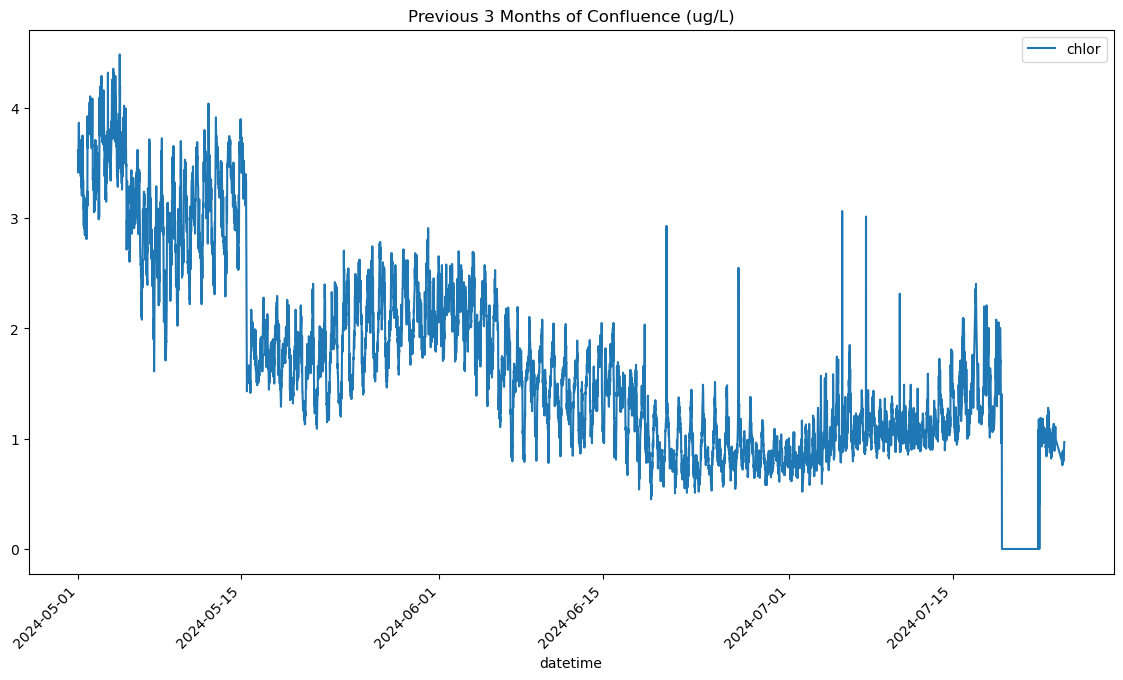

In [80]:
fig, ax = plt.subplots(figsize=(14, 8))

df.plot(ax=ax, x='datetime', y='chlor')
plt.xticks(rotation=45, ha='right')
plt.title("Previous 3 Months of Confluence (ug/L)")
plt.show()

## 1. Gap Filling
<hr>

## 2. Baseshifting
<hr>

## 3. Godin Filtering
<hr>

8026


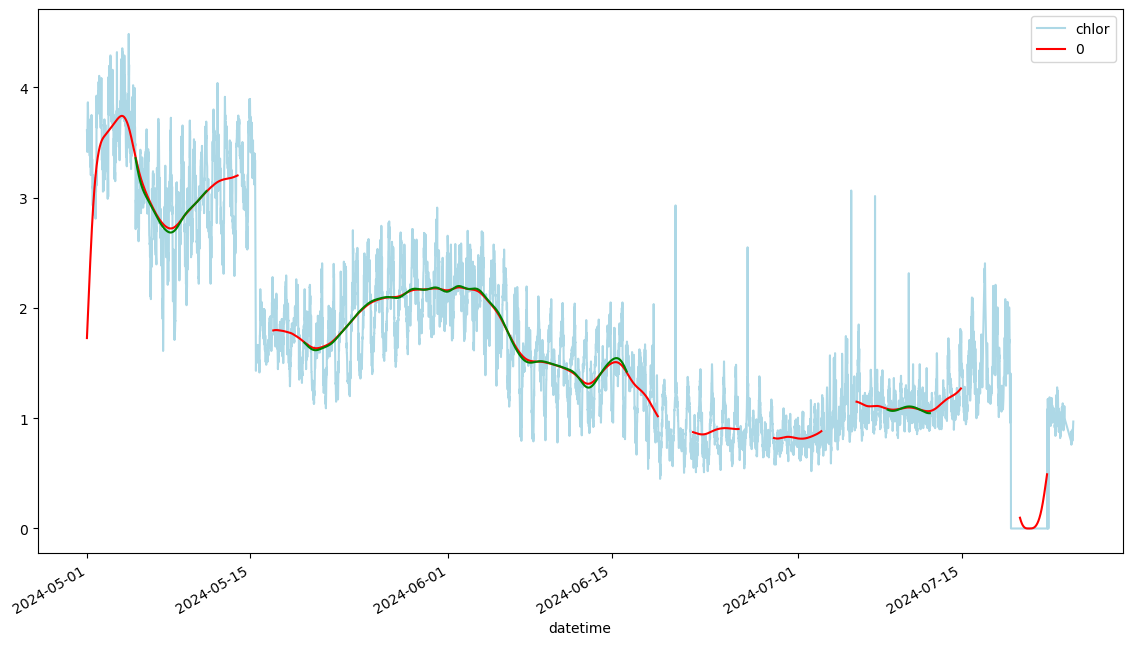

In [95]:
# https://cadwrdeltamodeling.github.io/vtools3/html/notebooks/filters.html
# https://github.com/CADWRDeltaModeling/vtools3/blob/master/vtools/functions/filter.py

df_tidal.datetime = pd.to_datetime(df_tidal.datetime)
df_tidal2 = df_tidal.set_index('datetime')
series_tidal = df_tidal2.chlor
print(len(series_tidal))

delta_tg = minutes(15)
series_tidal = series_tidal.asfreq(freq=delta_tg)
series_godin = ft.godin(series_tidal)
series_cosl = ft.cosine_lanczos(series_tidal, cutoff_period='40H')

fig, ax = plt.subplots(figsize=(14, 8))
df_tidal.plot(ax=ax, x='datetime', y='chlor', color='lightblue')
series_godin.plot(ax=ax, color='red', legend='Godin')
series_cosl.plot(ax=ax, color='green')

plt.show()

## 4. Outlier Detection
<hr>